# Project 1
- 2) Tìm hiểu bài toán phân loại văn bản đa nhãn Multi-label classification và các phương pháp giải quyết nó, tức là 1 input có thể thuộc về nhiều nhãn 

## Lib

In [1]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk import word_tokenize

import re
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Snape\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Snape\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
from wordcloud import WordCloud
from ast import literal_eval
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import sparse as sp_sparse

In [3]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

In [5]:
from sklearn.metrics import roc_curve, auc
# from scipy import interp
from itertools import cycle

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

#for visualisation
import yellowbrick
from yellowbrick.text import FreqDistVisualizer
from yellowbrick.text import TSNEVisualizer

## Read File

In [7]:
train_path ="data/predict_tag/"

In [8]:
train_df = pd.read_csv(train_path + "train.csv")
# test_df = pd.read_csv(test_path)

## Overiview data
- Create 'CONTEXT' column
- Drop
- check NA

In [9]:
# combining 'title' and 'abstract' column to| get more context
train_df['CONTEXT'] = train_df['TITLE'] + ". " + train_df['ABSTRACT']



In [10]:

# dropping useless features/columns
train_df.drop(labels=['TITLE', 'ABSTRACT', 'ID'], axis=1, inplace=True)

In [11]:
train_df.columns


Index(['Computer Science', 'Physics', 'Mathematics', 'Statistics',
       'Quantitative Biology', 'Quantitative Finance', 'CONTEXT'],
      dtype='object')

In [12]:
# rearranging columns
train_df = train_df[['CONTEXT', 'Computer Science', 'Physics', 'Mathematics', 'Statistics',
                     'Quantitative Biology', 'Quantitative Finance',]]
     

In [13]:
train_df.isna().sum()

CONTEXT                 0
Computer Science        0
Physics                 0
Mathematics             0
Statistics              0
Quantitative Biology    0
Quantitative Finance    0
dtype: int64

In [14]:
train_df.head()

CONTEXT  Computer Science  \
0  Reconstructing Subject-Specific Effect Maps.  ...                 1   
1  Rotation Invariance Neural Network.   Rotation...                 1   
2  Spherical polyharmonics and Poisson kernels fo...                 0   
3  A finite element approximation for the stochas...                 0   
4  Comparative study of Discrete Wavelet Transfor...                 1   

   Physics  Mathematics  Statistics  Quantitative Biology  \
0        0            0           0                     0   
1        0            0           0                     0   
2        0            1           0                     0   
3        0            1           0                     0   
4        0            0           1                     0   

   Quantitative Finance  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0

In [63]:
target_cols = ['Computer Science', 'Physics', 'Mathematics', 'Statistics',
       'Quantitative Biology', 'Quantitative Finance']
X = train_df['CONTEXT']
y = train_df[target_cols]
y

Computer Science  Physics  Mathematics  Statistics  \
0                     1        0            0           0   
1                     1        0            0           0   
2                     0        0            1           0   
3                     0        0            1           0   
4                     1        0            0           1   
...                 ...      ...          ...         ...   
20967                 1        1            0           0   
20968                 0        1            0           0   
20969                 1        0            0           0   
20970                 0        0            1           1   
20971                 0        0            1           1   

       Quantitative Biology  Quantitative Finance  
0                         0                     0  
1                         0                     0  
2                         0                     0  
3                         0                     0  
4                         0                     0  
...                     ...                   ...  
20967                     0                     0  
20968                     0                     0  
20969                     0                     0  
20970                     0                     0  
20971                     0                     0  

[20972 rows x 6 columns]

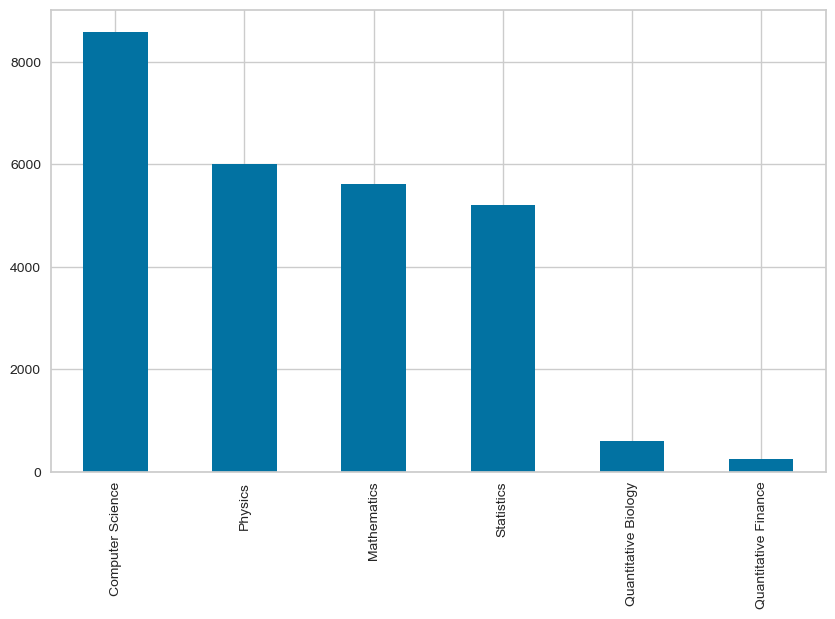

In [64]:
y_data_target = train_df[target_cols]

# Plot category data
plt.figure(figsize=(10,6))
y_data_target.sum(axis=0).plot.bar()
plt.show()

## Split data

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42, test_size= .25)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15729,)
(5243,)
(15729, 6)
(5243, 6)


In [17]:
X_train[:3]

2132     Partial and Total Dielectronic Recombination R...
9243     The Multiple Roots Phenomenon in Maximum Likel...
13444    Control Variates for Stochastic Gradient MCMC....
Name: CONTEXT, dtype: object

In [18]:
y_train

Computer Science  Physics  Mathematics  Statistics  \
2132                  0        1            0           0   
9243                  0        0            1           1   
13444                 1        0            0           1   
15347                 0        0            0           0   
18566                 1        0            0           0   
...                 ...      ...          ...         ...   
11284                 0        0            0           1   
11964                 0        1            0           0   
5390                  0        1            0           0   
860                   1        0            0           0   
15795                 1        0            0           0   

       Quantitative Biology  Quantitative Finance  
2132                      0                     0  
9243                      0                     0  
13444                     0                     0  
15347                     1                     0  
18566                     0                     0  
...                     ...                   ...  
11284                     0                     0  
11964                     0                     0  
5390                      0                     0  
860                       0                     0  
15795                     0                     0  

[15729 rows x 6 columns]

## Visual

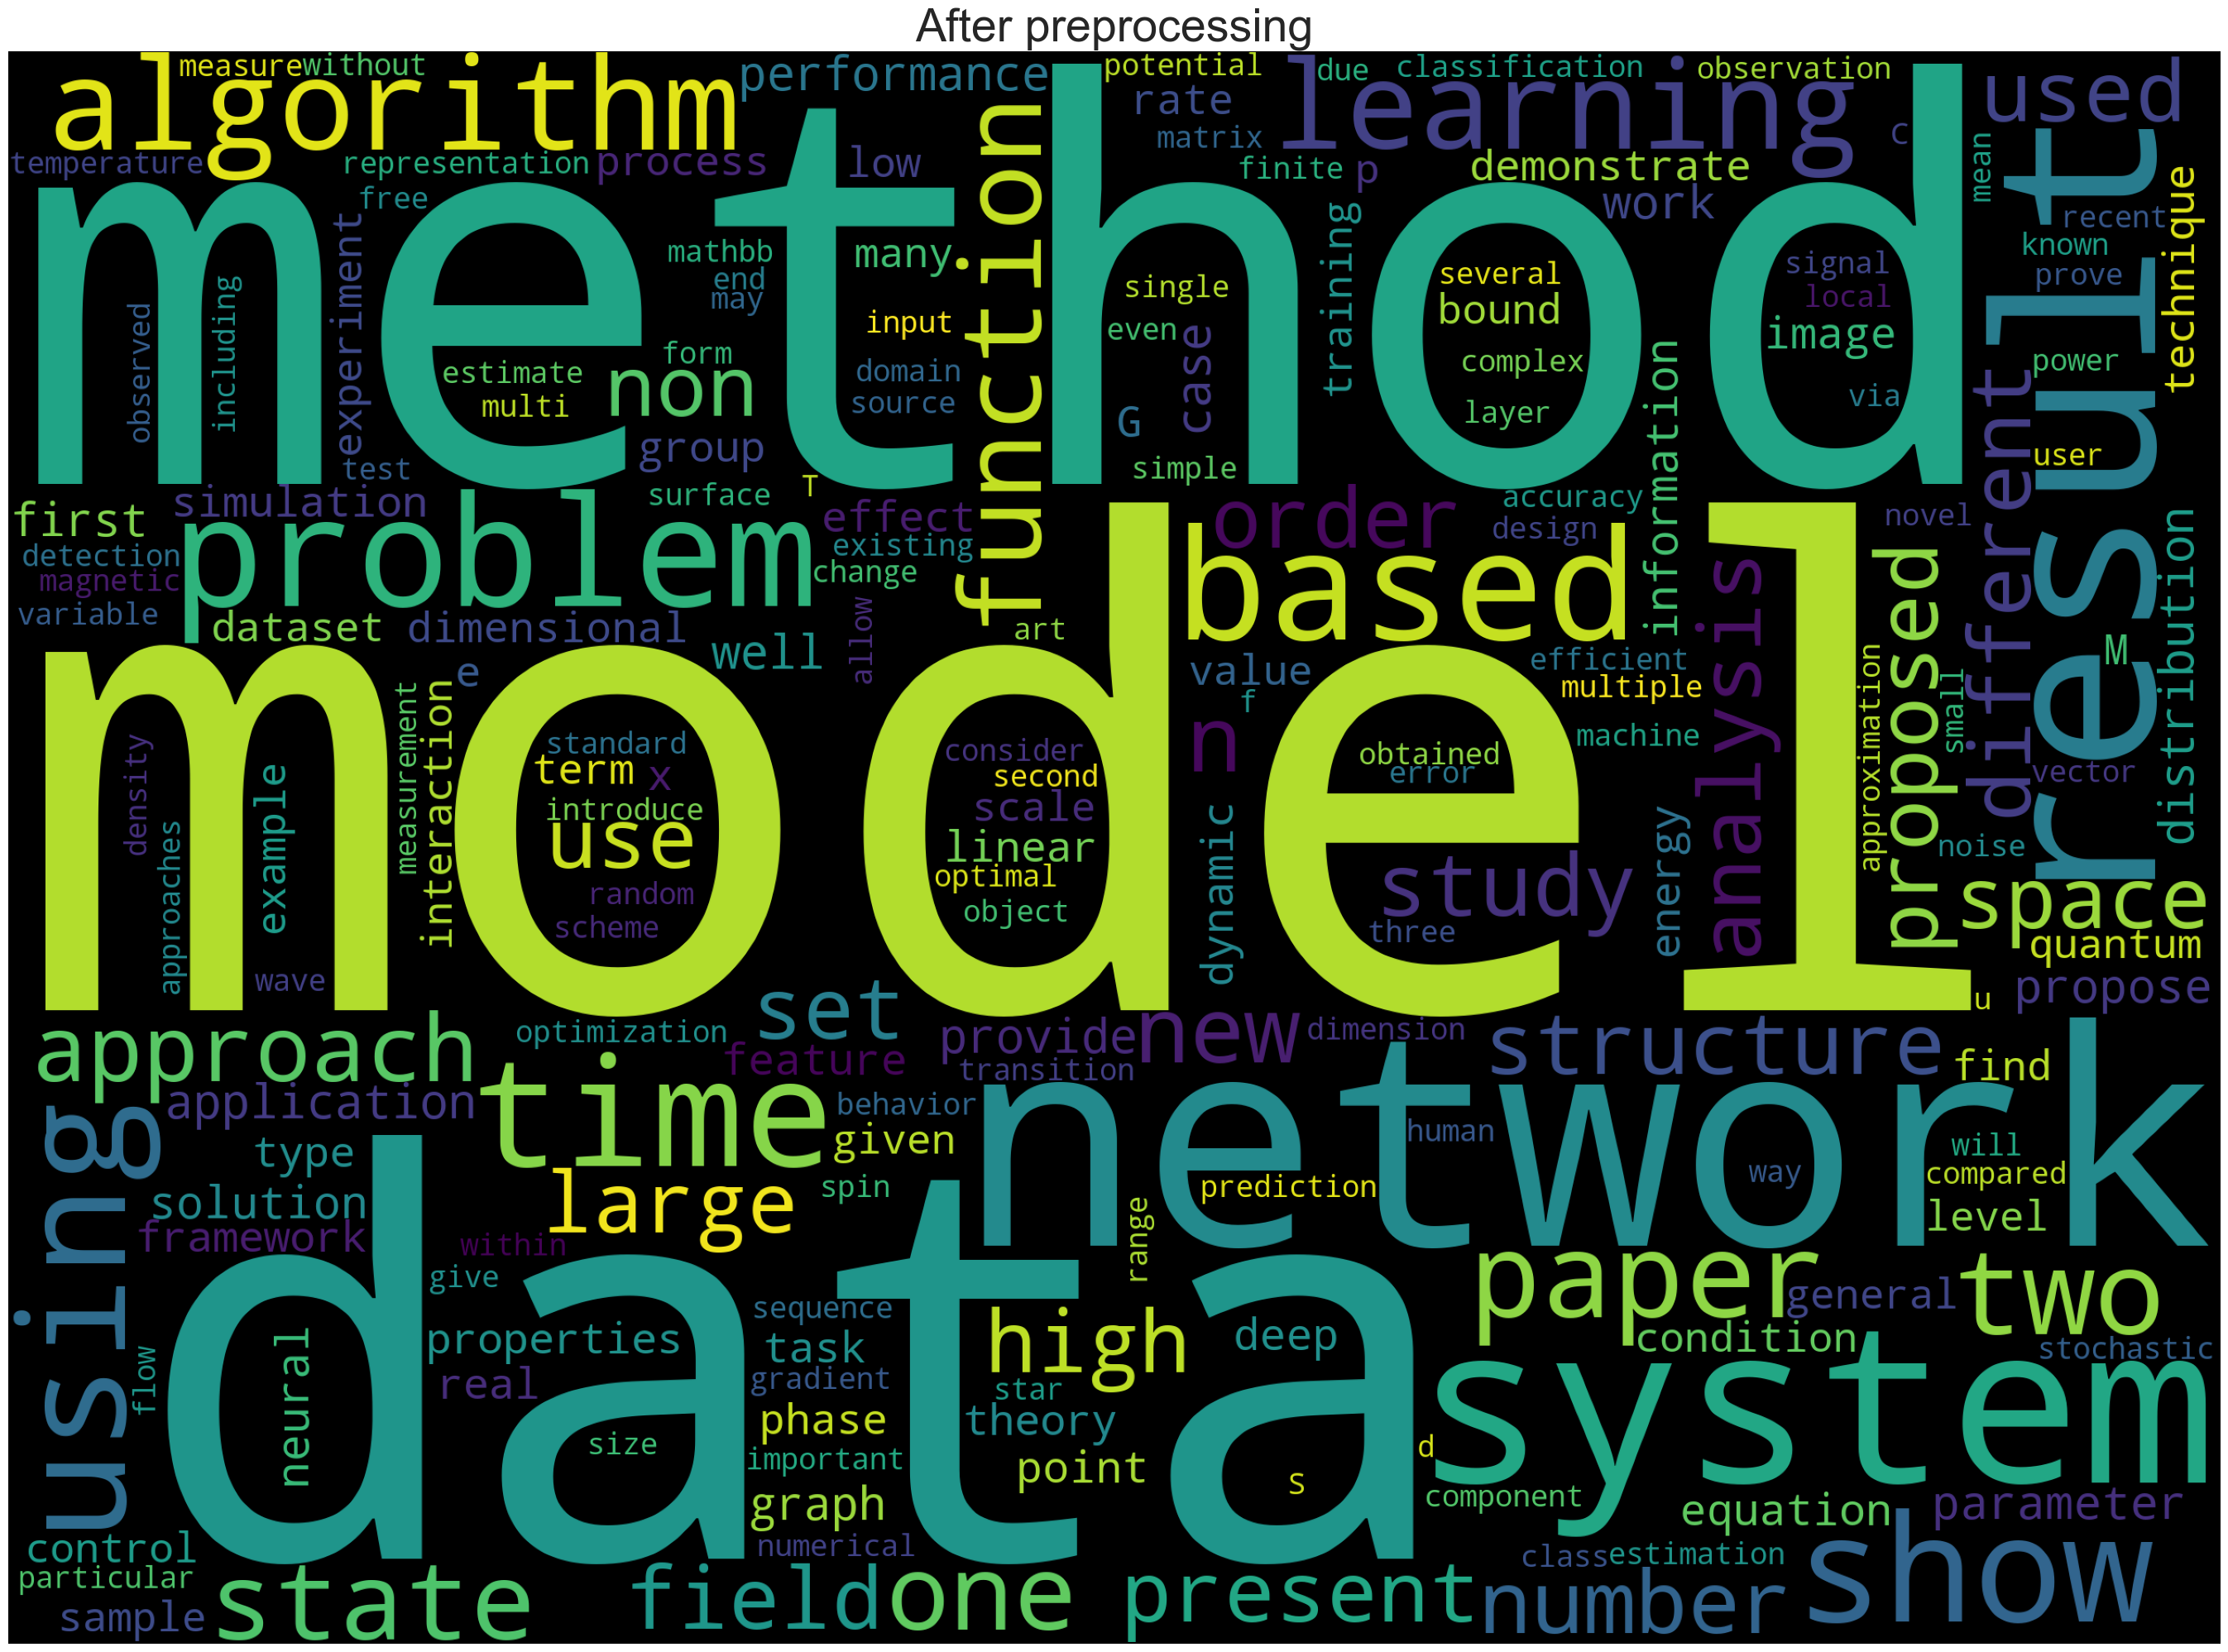

In [19]:
#Before preprocessing

from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize=(40,25))
# clean

text = X_train
cloud_comp = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))
plt.axis('off')
plt.title("After preprocessing",fontsize=40)
plt.imshow(cloud_comp)

### Preprocessing

In [20]:
# Regular expressions for cleaning text
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')  # Remove characters in this set with a space
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')           # Remove any character that is not alphanumeric or a space
STOPWORDS = set(stopwords.words('english'))            # Set of English stopwords

# Function to prepare text data
def text_prepare(text):
    text = text.lower()                                # Convert text to lowercase
    text = re.sub(REPLACE_BY_SPACE_RE, ' ', text)      # Replace specified characters with a space
    text = re.sub(BAD_SYMBOLS_RE, '', text)            # Remove symbols not allowed
    token_words = word_tokenize(text)                  # Tokenize the text into words
    filtered_words = [word for word in token_words if word not in STOPWORDS]  # Remove stopwords
    text = ''
    for word in filtered_words:                       
        if word != filtered_words[len(filtered_words)-1]:  # If not the last word, add a space after the word
            text = text + word + ' '
        else:                                          # If it's the last word, don't add a space after it
            text = text + word
    return text  # Return the cleaned text


In [21]:
X_train = [text_prepare(x) for x in X_train]
X_test = [text_prepare(x) for x in X_test]

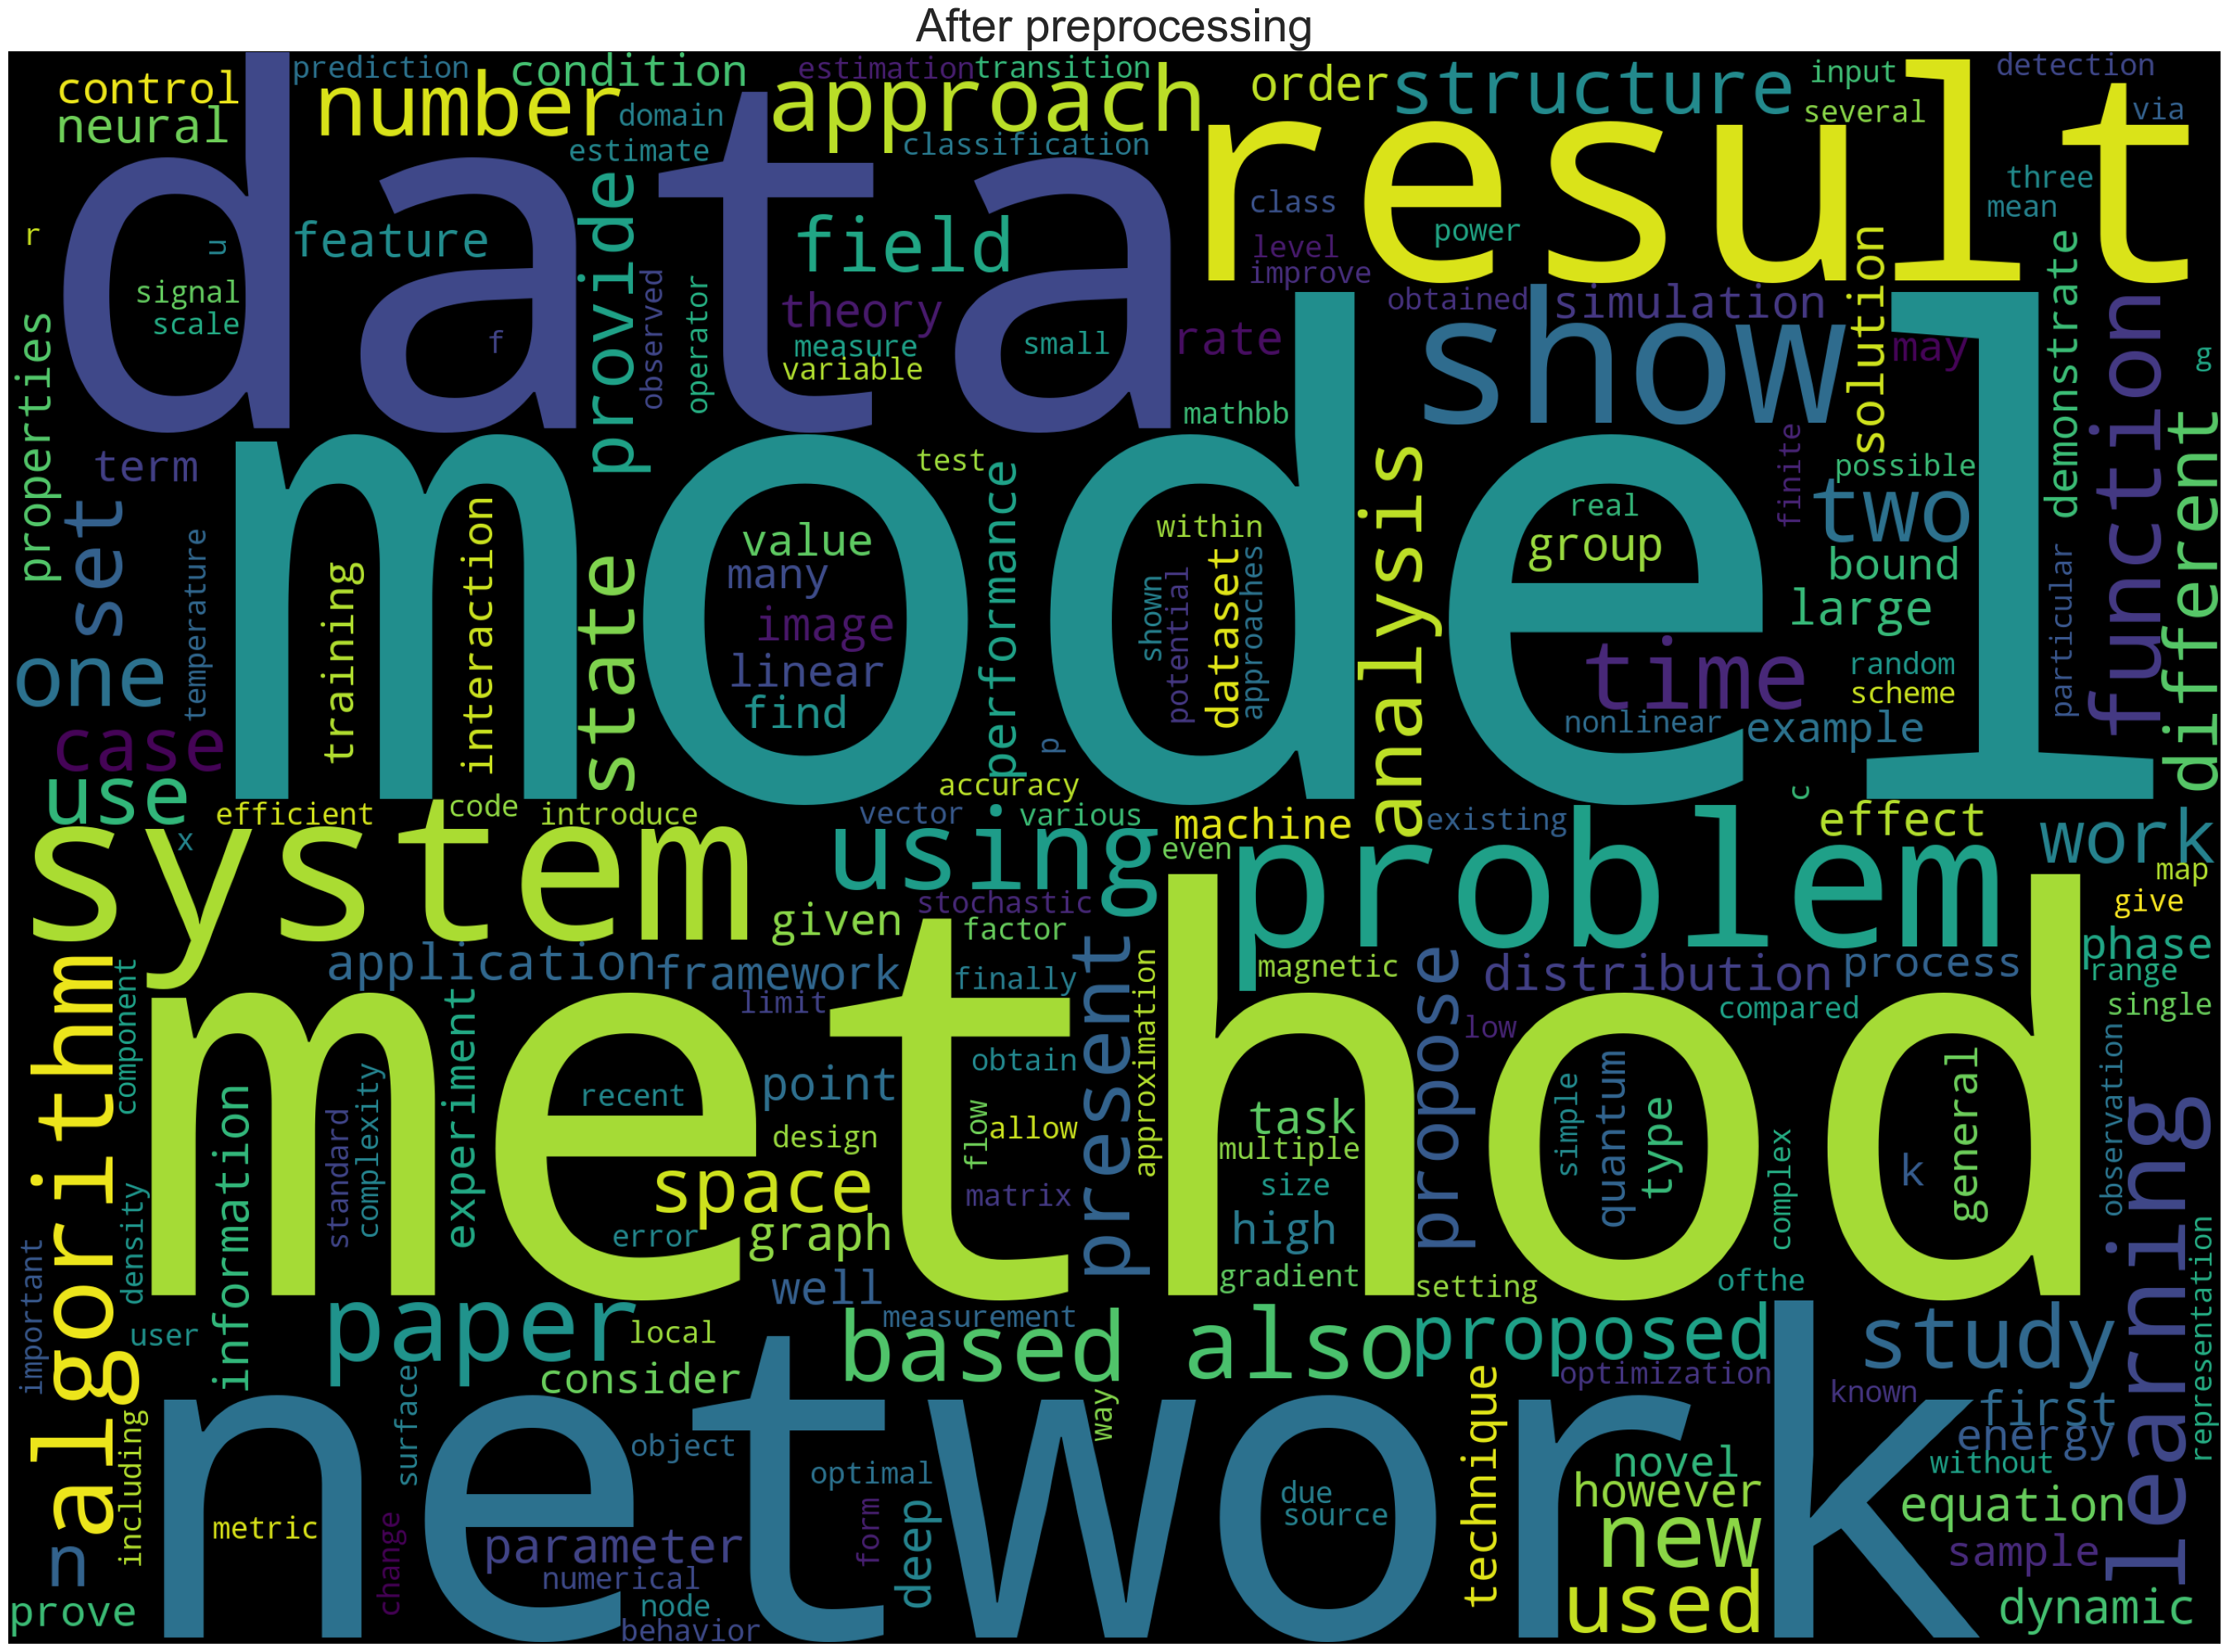

In [22]:
plt.figure(figsize=(40,25))
# clean

text = X_train
cloud_comp = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))
plt.axis('off')
plt.title("After preprocessing",fontsize=40)
plt.imshow(cloud_comp)

### TF-IDF
- considering the overall word frequencies within the corpora. This aids in penalizing overly common words and creates an improved feature space.

In [23]:
# Initialize a TfidfVectorizer with specific parameters
# strip_accents='unicode': Remove accents and perform unicode normalization
# analyzer='word': Analyze text data at the word level
# norm='l2': Apply L2 normalization to the term frequencies

vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', norm='l2')
vectorizer.fit(X_train)
vectorizer.fit(X_test)

TfidfVectorizer(strip_accents='unicode')

In [24]:
# Fit on the training data and transform both training and test data
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [25]:
# vectorizer.__dict__

In [26]:
feature_names = vectorizer.get_feature_names_out()

In [27]:
feature_names

array(['00', '000', '00000029', ..., 'zynqsystemonchip', 'zz', 'zz_2'],
      dtype=object)

In [28]:
idfs = vectorizer.idf_

In [29]:
# print(sorted(idfs))

In [30]:
fi = dict()
for i in range(len(feature_names)):
  fi[feature_names[i]] = idfs[i]

In [ ]:
# print(vectorizer.vocabulary_)

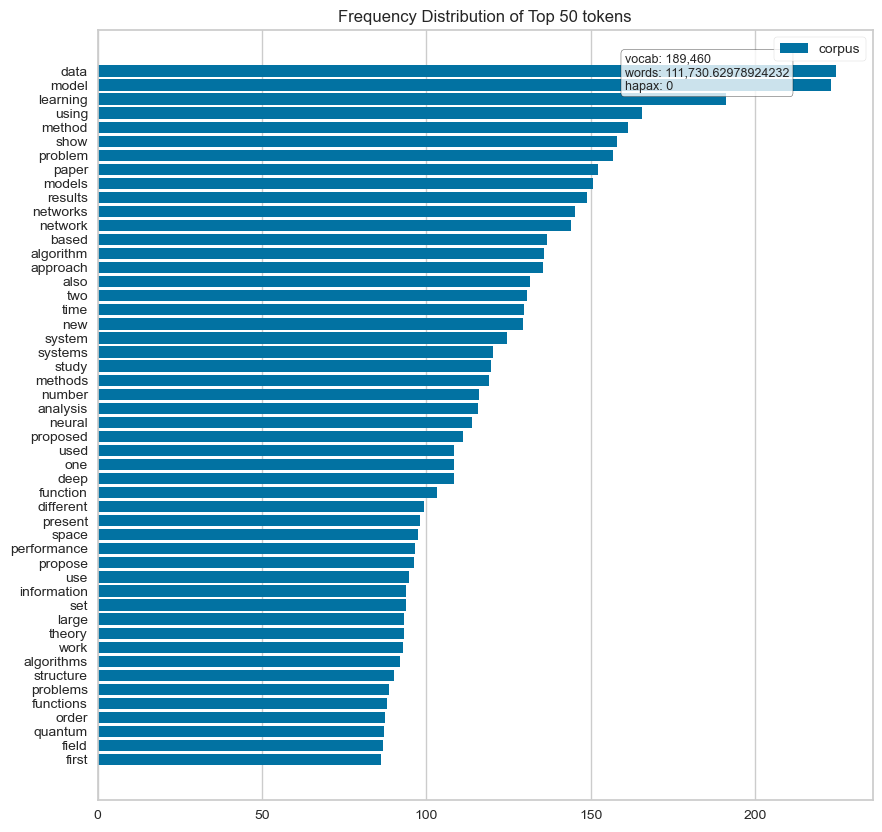

<Axes: title={'center': 'Frequency Distribution of Top 50 tokens'}>

In [32]:
# Create a FreqDistVisualizer object to visualize word frequency
# features=feature_names: Use the list of feature names (words) learned from TfidfVectorizer
visualizer = FreqDistVisualizer(features=feature_names,size=(1000, 1000))
visualizer.fit(X_train_tfidf)
visualizer.poof()

In [33]:
categories = y_train.keys()
len(categories)

6

c:\Users\Snape\anaconda3\envs\torch\Lib\site-packages\yellowbrick\text\tsne.py:401: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  self.ax.scatter(


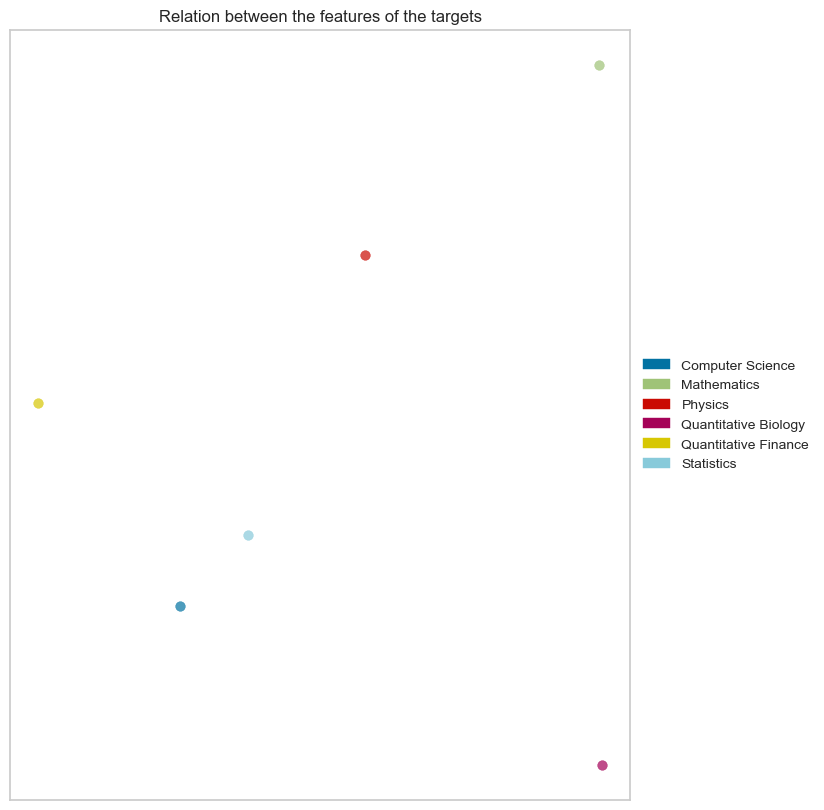

<Axes: title={'center': 'Relation between the features of the targets'}>

In [34]:
# visualize the relationship between the features
labels = categories
tsne = TSNEVisualizer(size=(1000, 1000), title='Relation between the features of the targets')
tsne.fit_transform(X_train_tfidf, labels)
tsne.poof()

In [35]:
X_train_tfidf, y_train

(<15729x189460 sparse matrix of type '<class 'numpy.float64'>'
 	with 1150877 stored elements in Compressed Sparse Row format>,
        Computer Science  Physics  Mathematics  Statistics  \
 2132                  0        1            0           0   
 9243                  0        0            1           1   
 13444                 1        0            0           1   
 15347                 0        0            0           0   
 18566                 1        0            0           0   
 ...                 ...      ...          ...         ...   
 11284                 0        0            0           1   
 11964                 0        1            0           0   
 5390                  0        1            0           0   
 860                   1        0            0           0   
 15795                 1        0            0           0   
 
        Quantitative Biology  Quantitative Finance  
 2132                      0                     0  
 9243               

### Train and test

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier

In [37]:
# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])

total_accuracy = 0

for category in categories:
    print('**Processing {} comments...**'.format(category))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(X_train_tfidf, y_train)
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(X_test_tfidf)
    current_accuracy = accuracy_score(y_test, prediction)
    total_accuracy += current_accuracy
    print('Test accuracy is {}'.format(current_accuracy))
    print("\n")

**Processing Computer Science comments...**
Test accuracy is 0.6391378981499142


**Processing Physics comments...**
Test accuracy is 0.6391378981499142


**Processing Mathematics comments...**
Test accuracy is 0.6391378981499142


**Processing Statistics comments...**
Test accuracy is 0.6391378981499142


**Processing Quantitative Biology comments...**
Test accuracy is 0.6391378981499142


**Processing Quantitative Finance comments...**
Test accuracy is 0.6391378981499142




In [38]:
total_accuracy / 6

0.6391378981499142

## Technique to solve this problem:
- Problem Transformation: Binary Relevance, Classifier Chains, Label Powerset
- Adapted Algorithm
- Ensemble approaches
- Neural Network

In [39]:
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import TruncatedSVD

from joblib import dump, load

#### Reduce dimension


In [40]:
svd = TruncatedSVD(n_components=1000)  # Adjust n_components as needed
X_train_tfidf_reduced = svd.fit_transform(X_train_tfidf)
X_test_tfidf_reduced = svd.transform(X_test_tfidf)

In [41]:
print(X_train_tfidf_reduced.shape)
print(X_test_tfidf_reduced.shape)

(15729, 1000)
(5243, 1000)


### Binary Relevance
- Classifier: GaussianNB

In [43]:
type(X_test)

list

In [44]:
Accuracy_BR = []

In [45]:
# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(classifier = GaussianNB())
# train
classifier.fit(X_train_tfidf_reduced, y_train)
# predict
predictions = classifier.predict(X_test_tfidf_reduced)
# accuracy
result_BR_NB = accuracy_score(y_test,predictions)
Accuracy_BR.append(result_BR_NB)
print("Accuracy = ", result_BR_NB)

Accuracy =  0.23097463284379172


- Classifier: SVM

In [46]:
# > 48m
# initialize Binary Relevance multi-label classifier
# with an SVM classifier
# SVM in scikit only supports the X matrix in sparse representation

# classifier = BinaryRelevance(
#     classifier = SVC(),
#     require_dense = [False, True]
# )

# # train
# classifier.fit(X_train_tfidf_reduced, y_train)

# # predict
# predictions = classifier.predict(X_test_tfidf_reduced)

# print("Accuracy = ",accuracy_score(y_test,predictions))

In [47]:
# save the model
# dump(classifier, 'classifier_BR_SVM.joblib') 

In [48]:
classifier_BR_SVM = load('classifier_BR_SVM.joblib')
predictions_BR_SVM = classifier_BR_SVM.predict(X_test_tfidf_reduced)

result_BR_SVM = accuracy_score(y_test,predictions_BR_SVM)
Accuracy_BR.append(result_BR_SVM)
print("Accuracy = ", result_BR_SVM)

Accuracy =  0.6566851039481213


- Classifier: Logistic Regression

In [49]:
classifier_brlr = BinaryRelevance(classifier = LogisticRegression())

# train
classifier_brlr.fit(X_train_tfidf_reduced, y_train)

# predict
predictions = classifier_brlr.predict(X_test_tfidf_reduced)

result_BR_LR = accuracy_score(y_test,predictions)
Accuracy_BR.append(result_BR_LR)
print("Accuracy = ", result_BR_LR)

Accuracy =  0.633034522220103


- Classifier: Random Forest

In [50]:
# initialize BinaryRelevance multi-label classifier with a RandomForest
classifier = BinaryRelevance(
    classifier = RandomForestClassifier(n_estimators=100),
    require_dense = [False, True]
)

# train
classifier.fit(X_train_tfidf_reduced, y_train)

# predict
predictions = classifier.predict(X_test_tfidf_reduced)

result_BR_RF = accuracy_score(y_test,predictions)
Accuracy_BR.append(result_BR_RF)
print("Accuracy = ", result_BR_RF) 

Accuracy =  0.5363341598321572


In [51]:
# save the model
dump(classifier, 'classifier_BR_RF.joblib') 

['classifier_BR_RF.joblib']

### Classifier Chain

- GaussianNB

In [52]:
Accuracy_CC = []

In [53]:
# initialize classifier chains multi-label classifier
# with a gaussian naive bayes base classifier
classifier = ClassifierChain(GaussianNB())

# train
classifier.fit(X_train_tfidf_reduced, y_train)

# predict
predictions = classifier.predict(X_test_tfidf_reduced)

result_CC_NB = accuracy_score(y_test,predictions)
Accuracy_CC.append(result_CC_NB)
print("Accuracy = ", result_CC_NB) 


Accuracy =  0.3154682433721152


In [54]:
# initialize classifier chains multi-label classifier
# with an SVM classifier
# SVM in scikit only supports the X matrix in sparse representation

# classifier = ClassifierChain(
#     classifier = SVC(),
#     require_dense = [False, True]
# )

# # train
# classifier.fit(X_train_tfidf_reduced, y_train)

# # predict
# predictions = classifier.predict(X_test_tfidf_reduced)

# result_CC_SVM = accuracy_score(y_test,predictions)
# Accuracy_CC.append(result_CC_SVM)
# print("Accuracy = ", result_CC_SVM) 

In [55]:
# save the model
# dump(classifier, 'classifier_CC_SVM.joblib') 

In [56]:
classifier_CC_SVM = load('classifier_CC_SVM.joblib')
predictions_CC_SVM = classifier_CC_SVM.predict(X_test_tfidf_reduced)

result_CC_SVM = accuracy_score(y_test,predictions_CC_SVM)
Accuracy_CC.append(result_CC_SVM)
print("Accuracy = ", result_CC_SVM)

Accuracy =  0.38413122258249094


In [57]:
# initialize classifier chains multi-label classifier
classifier = ClassifierChain(LogisticRegression())
# Training logistic regression model on train data
classifier.fit(X_train_tfidf_reduced, y_train)
# predict
predictions = classifier.predict(X_test_tfidf_reduced)

# accuracy
result_CC_LR = accuracy_score(y_test,predictions)
Accuracy_CC.append(result_CC_LR)
print("Accuracy = ", result_CC_LR) 

Accuracy =  0.6658401678428381


In [58]:
# initialize Classifier Chain multi-label classifier with a RandomForest
classifier = ClassifierChain(
    classifier = RandomForestClassifier(n_estimators=100),
    require_dense = [False, True]
)

# train
classifier.fit(X_train_tfidf_reduced, y_train)

# predict
predictions = classifier.predict(X_test_tfidf_reduced)

result_CC_RF = accuracy_score(y_test,predictions)
Accuracy_CC.append(result_CC_RF)
print("Accuracy = ", result_CC_RF) 

Accuracy =  0.5681861529658593


In [59]:
# save the model
dump(classifier, 'classifier_CC_RF.joblib') 

['classifier_CC_RF.joblib']

### Label Powerset
- GaussianNB

In [60]:
Accuracy_LP = []

In [61]:
# initialize Label Powerset multi-label classifier
# with a gaussian naive bayes base classifier
classifier = LabelPowerset(GaussianNB())

# train
classifier.fit(X_train_tfidf_reduced, y_train)

# predict
predictions = classifier.predict(X_test_tfidf_reduced)

result_LP_NB = accuracy_score(y_test,predictions)
Accuracy_LP.append(result_LP_NB)
print("Accuracy = ", result_LP_NB) 

Accuracy =  0.3971008964333397


- SVC

In [62]:
# initialize Label Powerset chains multi-label classifier
# with an SVM classifier
# SVM in scikit only supports the X matrix in sparse representation

classifier = LabelPowerset(
    classifier = SVC(),
    require_dense = [False, True]
)

# train
classifier.fit(X_train_tfidf_reduced, y_train)

# predict
predictions = classifier.predict(X_test_tfidf_reduced)

result_LP_SVM = accuracy_score(y_test,predictions)
Accuracy_LP.append(result_LP_SVM)
print("Accuracy = ", result_LP_SVM) 

Accuracy =  0.6885370970818234


- Logisitic Regression

In [63]:
# using Label Powerset
# initialize label powerset multi-label classifier
classifier = LabelPowerset(LogisticRegression())
# train
classifier.fit(X_train_tfidf_reduced, y_train)
# predict
predictions = classifier.predict(X_test_tfidf_reduced)
# accuracy
result_LP_LR = accuracy_score(y_test,predictions)
Accuracy_LP.append(result_LP_LR)
print("Accuracy = ", result_LP_LR) 

c:\Users\Snape\anaconda3\envs\torch\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy =  0.6748045012397482


- Random Forest

In [64]:
# initialize Label Powerset multi-label classifier with a RandomForest
classifier = LabelPowerset(
    classifier = RandomForestClassifier(n_estimators=100),
    require_dense = [False, True]
)

# train
classifier.fit(X_train_tfidf_reduced, y_train)

# predict
predictions = classifier.predict(X_test_tfidf_reduced)

result_LP_RF = accuracy_score(y_test,predictions)
Accuracy_LP.append(result_LP_RF)
print("Accuracy = ", result_LP_RF) 

Accuracy =  0.6135800114438299


In [71]:
# Navie Bayes, SVC , Logistic regression, Randomforest
print(Accuracy_BR) # Binary Relevance
print(Accuracy_CC) # Classifier Chains
print(Accuracy_LP) # Label Powerset

[0.23097463284379172, 0.6566851039481213, 0.633034522220103, 0.5363341598321572]
[0.3154682433721152, 0.38413122258249094, 0.6658401678428381, 0.5681861529658593]
[0.3971008964333397, 0.6885370970818234, 0.6748045012397482, 0.6135800114438299]


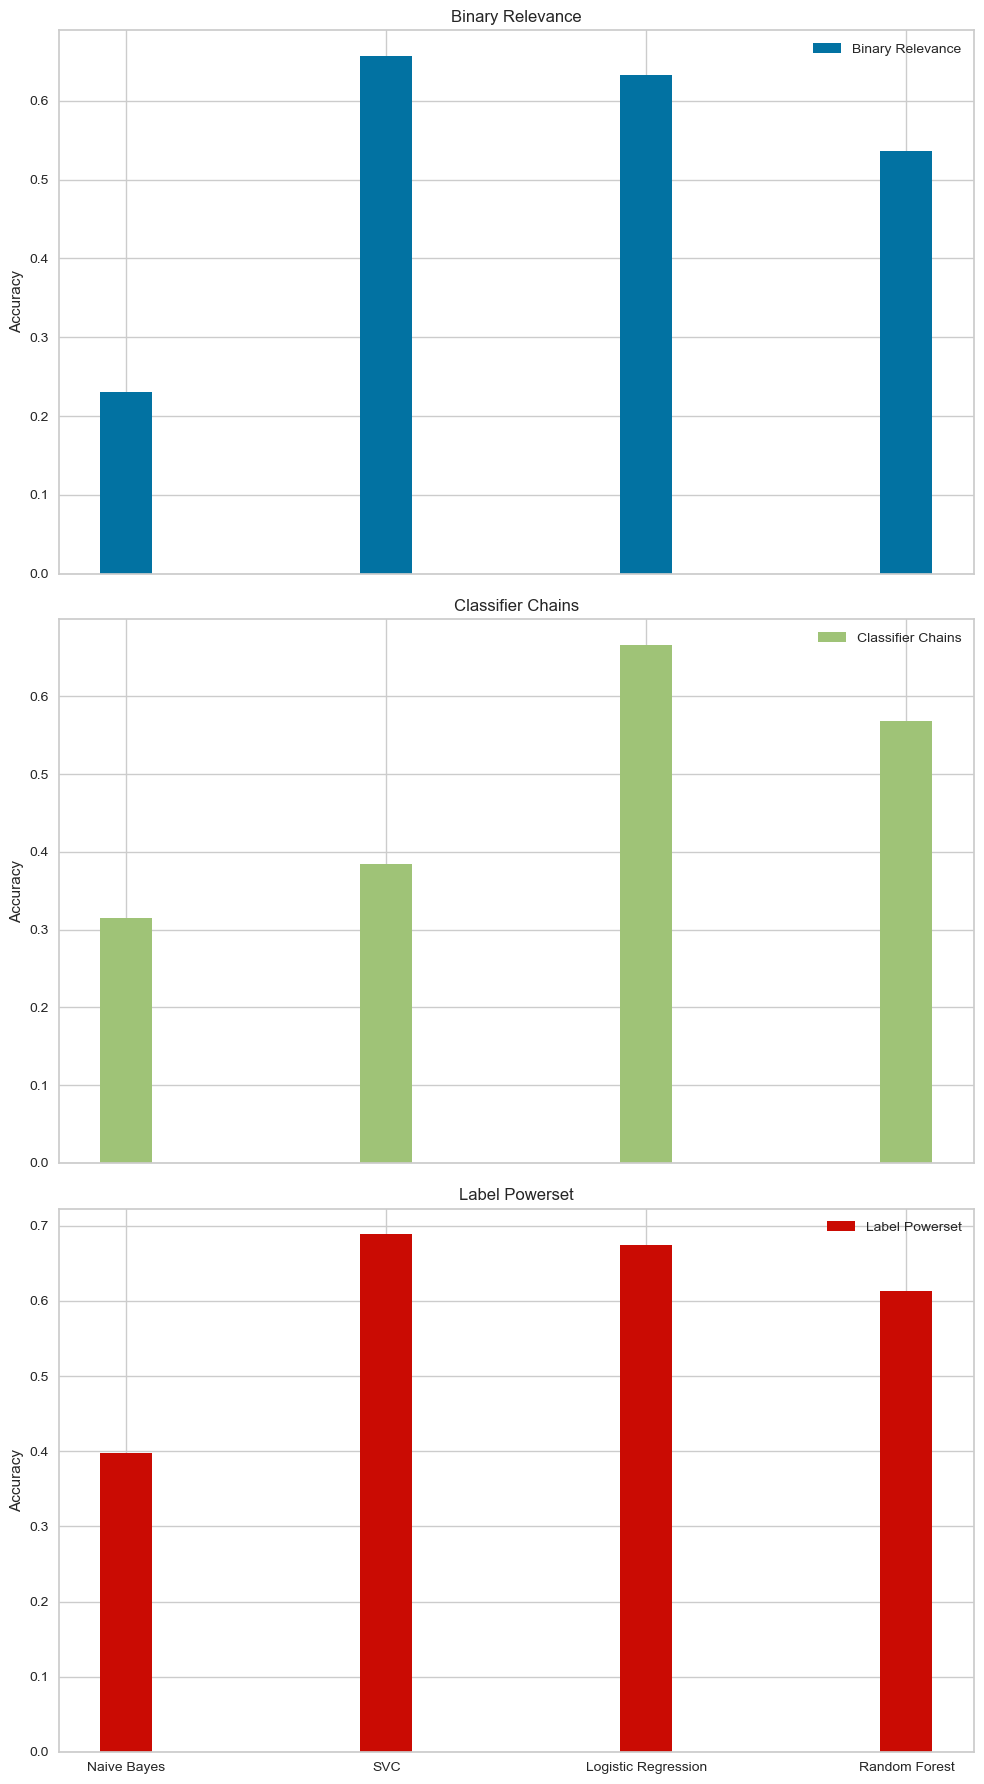

In [73]:
# Labels for classifiers
classifiers = ['Naive Bayes', 'SVC', 'Logistic Regression', 'Random Forest']

# X-axis locations for the groups
x = np.arange(len(classifiers))

# Width of a bar 
width = 0.2

# Plotting with 3 rows and 1 column
fig, axs = plt.subplots(3, 1, figsize=(10, 18), sharex=True)

# Binary Relevance
axs[0].bar(x, Accuracy_BR, width, label='Binary Relevance', color='b')
axs[0].set_title('Binary Relevance')
axs[0].set_xticks(x)
axs[0].set_xticklabels(classifiers)
axs[0].set_ylabel('Accuracy')
axs[0].legend()

# Classifier Chains
axs[1].bar(x, Accuracy_CC, width, label='Classifier Chains', color='g')
axs[1].set_title('Classifier Chains')
axs[1].set_xticks(x)
axs[1].set_xticklabels(classifiers)
axs[1].set_ylabel('Accuracy')
axs[1].legend()

# Label Powerset
axs[2].bar(x, Accuracy_LP, width, label='Label Powerset', color='r')
axs[2].set_title('Label Powerset')
axs[2].set_xticks(x)
axs[2].set_xticklabels(classifiers)
axs[2].set_ylabel('Accuracy')
axs[2].legend()

# Adding legends
for ax in axs:
    ax.legend()

plt.tight_layout()
plt.show()


### Adaptive approach: MLKNN

In [65]:
from skmultilearn.adapt import MLkNN
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import lil_matrix
from scipy import sparse
import numpy as np
from sklearn.metrics import accuracy_score, hamming_loss

In [66]:
class PatchedMLkNN(MLkNN):
    def _compute_cond(self, X, y):
        """Helper function to compute the posterior probabilities"""
        
        # Initialize the NearestNeighbors model with the number of neighbors (self.k)
        self.knn_ = NearestNeighbors(n_neighbors=self.k).fit(X)
        
        # Initialize sparse matrices to count label co-occurrences
        # c[i, j] will store the count of label i co-occurring with j positive neighbors
        c = sparse.lil_matrix((self._num_labels, self.k + 1), dtype='i8')
        
        # cn[i, j] will store the count of label i co-occurring with j negative neighbors
        cn = sparse.lil_matrix((self._num_labels, self.k + 1), dtype='i8')

        # Convert y to a dense array if it's in sparse format
        y_dense = y.toarray() if sparse.issparse(y) else y

        # Loop over each label to compute conditional probabilities
        for i in range(self._num_labels):
            # Get the indices of instances with label i present (positive) and absent (negative)
            positive_indices = np.where(y_dense[:, i] == 1)[0]
            negative_indices = np.where(y_dense[:, i] == 0)[0]
            
            # If there are positive instances, compute the k-nearest neighbors for them
            if len(positive_indices) > 0:
                distances, indices = self.knn_.kneighbors(X[positive_indices], n_neighbors=self.k, return_distance=True)
                
                # For each set of neighbors, count how many of them have label i
                for neighbor_set in indices:
                    neighbor_count = np.sum(y_dense[neighbor_set], axis=0)
                    c[i, neighbor_count[i]] += 1

            # If there are negative instances, compute the k-nearest neighbors for them
            if len(negative_indices) > 0:
                distances, indices = self.knn_.kneighbors(X[negative_indices], n_neighbors=self.k, return_distance=True)
                
                # For each set of neighbors, count how many of them have label i
                for neighbor_set in indices:
                    neighbor_count = np.sum(y_dense[neighbor_set], axis=0)
                    cn[i, neighbor_count[i]] += 1

        # Return the counts of co-occurrences for positive and negative instances
        return c, cn


In [67]:

# Use the patched class
classifier_new = PatchedMLkNN()
# Convert sparse matrices to dense arrays
x_train = lil_matrix(X_train_tfidf_reduced).toarray()
y_train = lil_matrix(y_train).toarray()
x_test = lil_matrix(X_test_tfidf_reduced).toarray()
# Train
classifier_new.fit(x_train, y_train)
# Predict
predictions_new = classifier_new.predict(x_test)
# Accuracy
print("Accuracy = ", accuracy_score(y_test, predictions_new))

Accuracy =  0.35685676139614725


In [68]:
classifier = PatchedMLkNN(k=20)

# train
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

print("Accuracy = ",accuracy_score(y_test,predictions_new))

Accuracy =  0.35685676139614725


## Bert

In [17]:
!nvidia-smi

Thu May 23 17:57:45 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 552.44                 Driver Version: 552.44         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4050 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   43C    P0             12W /   80W |       0MiB /   6141MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [19]:
X_train

2132     Partial and Total Dielectronic Recombination R...
9243     The Multiple Roots Phenomenon in Maximum Likel...
13444    Control Variates for Stochastic Gradient MCMC....
15347    Time pressure and honesty in a deception game....
18566    Time-Sensitive Networking for robotics.   We a...
                               ...                        
11284    Tensor Methods for Nonlinear Matrix Completion...
11964    Numerical Simulations of Collisional Cascades ...
5390     Possible evidence for spin-transfer torque ind...
860      Common Knowledge in a Logic of Gossips.   Goss...
15795    Trust-Based Collaborative Filtering: Tackling ...
Name: CONTEXT, Length: 15729, dtype: object

In [ ]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 100
# This is fixed.
EMBEDDING_DIM = 100


In [31]:
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [39]:
y_test


Computer Science  Physics  Mathematics  Statistics  \
20257                 1        0            0           0   
482                   0        0            1           1   
4189                  1        0            1           0   
9838                  0        1            0           1   
16591                 1        0            0           0   
...                 ...      ...          ...         ...   
10827                 0        1            0           0   
4304                  0        0            1           0   
10747                 1        0            0           1   
8382                  1        0            0           0   
18053                 0        1            0           0   

       Quantitative Biology  Quantitative Finance  
20257                     0                     0  
482                       0                     0  
4189                      0                     0  
9838                      0                     0  
16591                     0                     0  
...                     ...                   ...  
10827                     0                     0  
4304                      0                     0  
10747                     0                     0  
8382                      0                     0  
18053                     0                     0  

[5243 rows x 6 columns]

In [41]:
max_words = len(set(" ".join(X_train).split()))
max_len = X_train.apply(lambda x: len(x)).max()

In [ ]:
# hyperparameters
MAX_LEN = 256
BATCH_SIZE = 32
EMBEDDING_DIM = 100
EPOCHS = 2
LEARNING_RATE = 1e-05

In [43]:
# Tokenize the text data
tokenizer = Tokenizer(num_words=max_len)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)


In [ ]:

X_test_seq = tokenizer.texts_to_sequences(X_test)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Convert targets to float tensors
y_train = torch.tensor(y_train.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32)   

In [54]:
y_train.shape[1]

6

In [53]:
class CustomDataset(Dataset):
    def __init__(self, texts, targets):
        self.texts = texts
        self.targets = targets

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, index):
        return {
            'input_ids': torch.tensor(self.texts[index], dtype=torch.long),
            'targets': self.targets[index]
        }

train_dataset = CustomDataset(X_train_pad, y_train)
test_dataset = CustomDataset(X_test_pad, y_test)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)


In [55]:
class TextClassificationLSTM(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size, output_size):
        super(TextClassificationLSTM, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.lstm = nn.LSTM(embed_size, hidden_size, batch_first=True, dropout=0.2)
        self.dropout = nn.Dropout(0.2)
        self.fc = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.embedding(x)
        x, _ = self.lstm(x)
        x = self.dropout(x)
        x = x[:, -1, :]  # Take the output of the last LSTM cell
        x = self.fc(x)
        x = self.sigmoid(x)
        return x

VOCAB_SIZE = min(max_len, len(tokenizer.word_index) + 1)
EMBED_SIZE = EMBEDDING_DIM
HIDDEN_SIZE = 100
OUTPUT_SIZE = y_train.shape[1]  # Number of classes

model = TextClassificationLSTM(VOCAB_SIZE, EMBED_SIZE, HIDDEN_SIZE, OUTPUT_SIZE)
model.to(device)


c:\Users\Snape\anaconda3\envs\torch\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


TextClassificationLSTM(
  (embedding): Embedding(2862, 100)
  (lstm): LSTM(100, 100, batch_first=True, dropout=0.2)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc): Linear(in_features=100, out_features=6, bias=True)
  (sigmoid): Sigmoid()
)

In [ ]:
# Training Loop
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [58]:
train_acc = []
val_acc = []
train_loss = []
val_loss = []

for epoch in range(EPOCHS):
    model.train()
    correct = 0
    total = 0
    epoch_train_loss = 0

    for batch in train_loader:
        inputs = batch['input_ids'].to(device)
        targets = batch['targets'].to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        epoch_train_loss += loss.item()
        preds = (outputs > 0.5).float()
        correct += (preds == targets).sum().item()
        total += targets.size(0) * targets.size(1)

    train_acc.append(correct / total)
    train_loss.append(epoch_train_loss / len(train_loader))

    model.eval()
    correct = 0
    total = 0
    epoch_val_loss = 0

    with torch.no_grad():
        for batch in test_loader:
            inputs = batch['input_ids'].to(device)
            targets = batch['targets'].to(device)

            outputs = model(inputs)
            loss = criterion(outputs, targets)
            epoch_val_loss += loss.item()
            preds = (outputs > 0.5).float()
            correct += (preds == targets).sum().item()
            total += targets.size(0) * targets.size(1)

    val_acc.append(correct / total)
    val_loss.append(epoch_val_loss / len(test_loader))

    print(f'Epoch {epoch+1}/{EPOCHS}, Train Loss: {train_loss[-1]:.4f}, Val Loss: {val_loss[-1]:.4f}, Train Acc: {train_acc[-1]:.4f}, Val Acc: {val_acc[-1]:.4f}')



Epoch 1/25, Train Loss: 0.0408, Val Loss: 0.3875, Train Acc: 0.9862, Val Acc: 0.9057
Epoch 2/25, Train Loss: 0.0342, Val Loss: 0.4052, Train Acc: 0.9891, Val Acc: 0.9044
Epoch 3/25, Train Loss: 0.0295, Val Loss: 0.4246, Train Acc: 0.9907, Val Acc: 0.9063
Epoch 4/25, Train Loss: 0.0259, Val Loss: 0.4414, Train Acc: 0.9919, Val Acc: 0.9040
Epoch 5/25, Train Loss: 0.0265, Val Loss: 0.4386, Train Acc: 0.9915, Val Acc: 0.9055
Epoch 6/25, Train Loss: 0.0252, Val Loss: 0.4587, Train Acc: 0.9921, Val Acc: 0.9037
Epoch 7/25, Train Loss: 0.0218, Val Loss: 0.4652, Train Acc: 0.9935, Val Acc: 0.9064
Epoch 8/25, Train Loss: 0.0210, Val Loss: 0.4804, Train Acc: 0.9934, Val Acc: 0.9040
Epoch 9/25, Train Loss: 0.0220, Val Loss: 0.5062, Train Acc: 0.9930, Val Acc: 0.9057
Epoch 10/25, Train Loss: 0.0223, Val Loss: 0.4776, Train Acc: 0.9929, Val Acc: 0.9026
Epoch 11/25, Train Loss: 0.0231, Val Loss: 0.5041, Train Acc: 0.9928, Val Acc: 0.9038
Epoch 12/25, Train Loss: 0.0151, Val Loss: 0.5199, Train Acc: 0

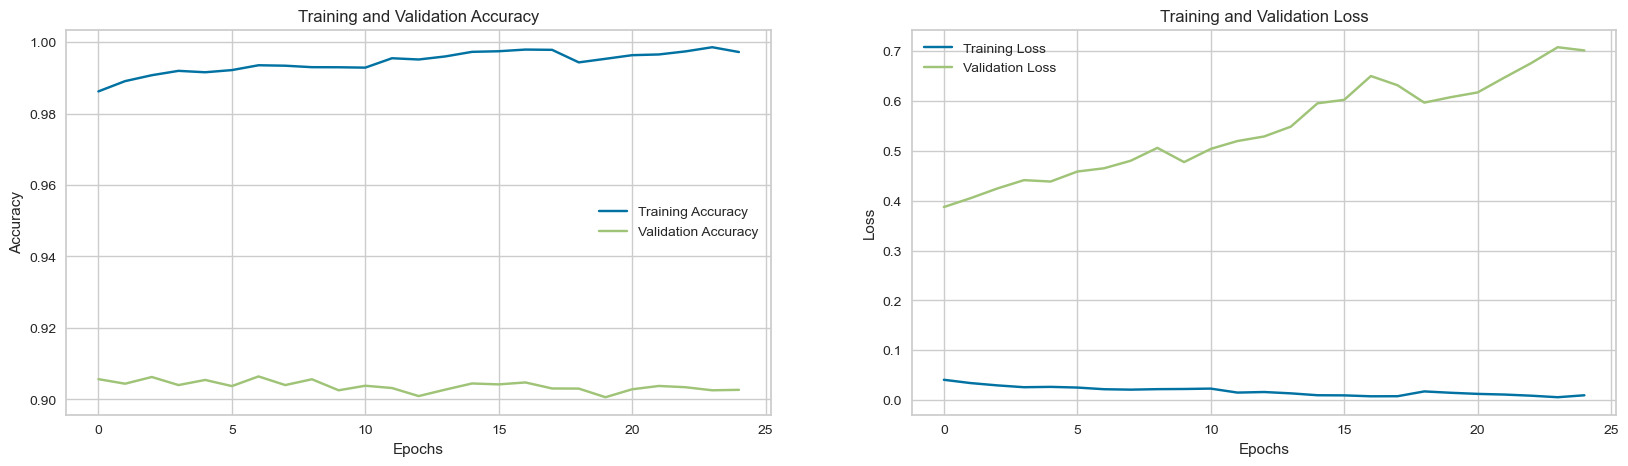

In [61]:
# Plotting
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()